In [1]:
import numpy as np
import os
import pandas as pd
from jupyterthemes import jtplot

jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

## Load Dataset: Beijing PM2.5

In [2]:
dataset_root = "../datasets/"
csvfile = os.path.join(dataset_root, "beijing_pm2.5", "PRSA_data_2010.1.1-2014.12.31.csv")
fields = ['year','month','day','DEWP','TEMP','PRES','Is','Ir'] # Specific columns to use.
df = pd.read_csv(csvfile, usecols=fields)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    43824 non-null  int64  
 1   month   43824 non-null  int64  
 2   day     43824 non-null  int64  
 3   DEWP    43824 non-null  int64  
 4   TEMP    43824 non-null  float64
 5   PRES    43824 non-null  float64
 6   Is      43824 non-null  int64  
 7   Ir      43824 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 2.7 MB


In [3]:
# Create single date column from independent year/month/day columns.
df = df.assign(date=pd.to_datetime(df[['year','month','day']]))
df.head()

,year,month,day,DEWP,TEMP,PRES,Is,Ir,date
0,2010,1,1,-21,-11.0,1021.0,0,0,2010-01-01
1,2010,1,1,-21,-12.0,1020.0,0,0,2010-01-01
2,2010,1,1,-21,-11.0,1019.0,0,0,2010-01-01
3,2010,1,1,-21,-14.0,1019.0,0,0,2010-01-01
4,2010,1,1,-20,-12.0,1018.0,0,0,2010-01-01


## Feature Definitions

List of plants to grow, with scores that rate their performance in a given interval of time. Scores should be floating-point numbers within a range (possibly from `[0,10]`) for each plant. The score matrix should have columns that correspond to each plant, and rows that correspond to each time interval.

For example:
```python
features = ['tomato', 'sunflower', 'cucumber']
scores = [[3, 7, 10], [2, 1, 5], [7, 9, 11]]
```

**Note**: The scores should eventually be normalized between `[0,1]` to accommodate different input score ranges.

In [4]:
# Add feature scores to the dataset.
# These scores should be normalized between [0,1].
features = ['tomato', 'sunflower', 'cucumber']
df = df.assign(**{feat:np.random.uniform(0.0, 1.0, size=df.shape[0]) for feat in features})
df.head()

,year,month,day,DEWP,TEMP,PRES,Is,Ir,date,tomato,sunflower,cucumber
0,2010,1,1,-21,-11.0,1021.0,0,0,2010-01-01,0.019448,0.039553,0.170684
1,2010,1,1,-21,-12.0,1020.0,0,0,2010-01-01,0.554634,0.851277,0.757258
2,2010,1,1,-21,-11.0,1019.0,0,0,2010-01-01,0.399710,0.396936,0.620668
3,2010,1,1,-21,-14.0,1019.0,0,0,2010-01-01,0.423424,0.736920,0.454245
4,2010,1,1,-20,-12.0,1018.0,0,0,2010-01-01,0.077567,0.246137,0.437557


In [5]:
# Ensure rows are in time-sorted ascending order.
df = df.sort_values(['date'], ascending=[True])

## Data Visualization

In [6]:
import matplotlib.pyplot as plt

In [7]:
# Group records by month.
gdf = df.groupby(pd.Grouper(key='date', freq='M'))

Text(0.5, 1.0, 'Average Plant Score per Month')

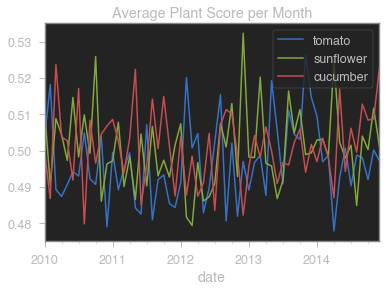

In [8]:
# Visualize average plant scores per month.
gdf.mean()[features].plot()
plt.title('Average Plant Score per Month')

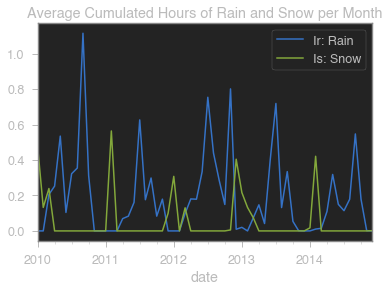

In [9]:
gdf.mean()[['Ir', 'Is']].plot()
plt.title('Average Cumulated Hours of Rain and Snow per Month')
plt.legend(['Ir: Rain', 'Is: Snow'])

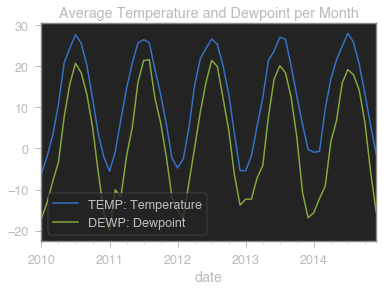

In [10]:
gdf.mean()[['TEMP', 'DEWP']].plot()
plt.title('Average Temperature and Dewpoint per Month')
plt.legend(['TEMP: Temperature', 'DEWP: Dewpoint'])

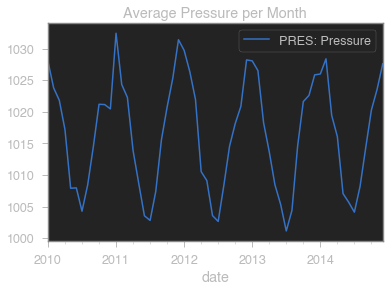

In [11]:
gdf.mean()[['PRES']].plot()
plt.title('Average Pressure per Month')
plt.legend(['PRES: Pressure'])